In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
df= pd.read_csv('CICDDoS 1 percent with 24 Features.csv')

In [ ]:
df[' Label']=df[' Label'].apply({'Portmap':'Portmap','DrDoS_DNS':'DrDoS_DNS','BENIGN':'BENIGN' , 'DrDoS_NTP':'DrDoS_NTP', 'DrDoS_SNMP':'DrDoS_SNMP', 'DrDoS_SSDP':'DrDoS_SSDP', 'DrDoS_UDP':'DrDoS_UDP', 'LDAP':'LDAP', 'MSSQL': 'MSSQL', 'NetBIOS':'NetBIOS','Syn':'Syn', 'TFTP': 'TFTP', 'UDP-lag':'UDP-lag'}.get)

In [ ]:
NaN_values=df.isnull().sum()
NaN_values

Unnamed: 0                        0
 Source Port                      0
 Destination Port                 0
Total Length of Fwd Packets       0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
Flow Bytes/s                   2525
 Flow Packets/s                   0
 Flow IAT Std                     0
 Flow IAT Min                     0
 Fwd IAT Min                      0
 Fwd Header Length                0
Fwd Packets/s                     0
 Min Packet Length                0
 Max Packet Length                0
 Packet Length Mean               0
 ACK Flag Count                   0
 Average Packet Size              0
 Avg Fwd Segment Size             0
 Fwd Header Length.1              0
 Subflow Fwd Bytes                0
Init_Win_bytes_forward            0
 min_seg_size_forward             0
 Inbound                          0
 Label                            4
dtype: int64

In [ ]:
df = df.drop(columns="Unnamed: 0")

df = df.replace(np.PINF, 0)
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
#NaN_values1=df.isnull().sum()
#NaN_values1

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
NaN_values1=df.isnull().sum()
NaN_values1

 Source Port                   0
 Destination Port              0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Std                  0
 Flow IAT Min                  0
 Fwd IAT Min                   0
 Fwd Header Length             0
Fwd Packets/s                  0
 Min Packet Length             0
 Max Packet Length             0
 Packet Length Mean            0
 ACK Flag Count                0
 Average Packet Size           0
 Avg Fwd Segment Size          0
 Fwd Header Length.1           0
 Subflow Fwd Bytes             0
Init_Win_bytes_forward         0
 min_seg_size_forward          0
 Inbound                       0
 Label                         0
dtype: int64

In [ ]:
df= shuffle (df)
df

,Source Port,Destination Port,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Min,...,Packet Length Mean,ACK Flag Count,Average Packet Size,Avg Fwd Segment Size,Fwd Header Length.1,Subflow Fwd Bytes,Init_Win_bytes_forward,min_seg_size_forward,Inbound,Label
530033,62528,26600,1032.0,516.0,516.0,516.0,5.160000e+08,1.000000e+06,0.000000e+00,2.0,...,516.0,0,774.0,516.0,16,1032,-1,8,1,TFTP
162862,62618,6841,2064.0,516.0,516.0,516.0,6.879895e+02,1.333313e+00,1.732075e+06,1.0,...,516.0,0,645.0,516.0,-2125437910,2064,-1,-1062718975,1,TFTP
291723,1001,11922,458.0,229.0,229.0,229.0,9.160000e+06,4.000000e+04,0.000000e+00,50.0,...,229.0,0,343.5,229.0,40,458,-1,20,1,NetBIOS
452973,62476,55986,2064.0,516.0,516.0,516.0,6.879656e+02,1.333267e+00,1.732135e+06,1.0,...,516.0,0,645.0,516.0,40,2064,-1,0,1,TFTP
23591,42543,19551,2064.0,516.0,516.0,516.0,6.894115e+02,1.336069e+00,1.728502e+06,1.0,...,516.0,0,645.0,516.0,80,2064,-1,20,1,TFTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429967,57055,62248,0.0,0.0,0.0,0.0,0.000000e+00,2.000000e+06,0.000000e+00,1.0,...,0.0,1,0.0,0.0,40,0,5840,20,1,Syn
544782,62505,25416,1032.0,516.0,516.0,516.0,1.032000e+09,2.000000e+06,0.000000e+00,1.0,...,516.0,0,774.0,516.0,40,1032,-1,20,1,TFTP
342470,62495,10234,2064.0,516.0,516.0,516.0,6.883586e+02,1.334028e+00,1.731147e+06,1.0,...,516.0,0,645.0,516.0,80,2064,-1,20,1,TFTP
358420,580,37501,1032.0,516.0,516.0,516.0,1.032000e+09,2.000000e+06,0.000000e+00,1.0,...,516.0,0,774.0,516.0,0,1032,-1,0,1,TFTP


In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df.head(30)

,Source Port,Destination Port,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Std,Flow IAT Min,...,Packet Length Mean,ACK Flag Count,Average Packet Size,Avg Fwd Segment Size,Fwd Header Length.1,Subflow Fwd Bytes,Init_Win_bytes_forward,min_seg_size_forward,Inbound,Label
530033,62528,26600,1032.0,516.0,516.0,516.0,5.160000e+08,1.000000e+06,0.000000e+00,2.0,...,516.0,0,774.0,516.0,16,1032,-1,8,1,11
162862,62618,6841,2064.0,516.0,516.0,516.0,6.879895e+02,1.333313e+00,1.732075e+06,1.0,...,516.0,0,645.0,516.0,-2125437910,2064,-1,-1062718975,1,11
291723,1001,11922,458.0,229.0,229.0,229.0,9.160000e+06,4.000000e+04,0.000000e+00,50.0,...,229.0,0,343.5,229.0,40,458,-1,20,1,8
452973,62476,55986,2064.0,516.0,516.0,516.0,6.879656e+02,1.333267e+00,1.732135e+06,1.0,...,516.0,0,645.0,516.0,40,2064,-1,0,1,11
23591,42543,19551,2064.0,516.0,516.0,516.0,6.894115e+02,1.336069e+00,1.728502e+06,1.0,...,516.0,0,645.0,516.0,80,2064,-1,20,1,11
21285,513,61077,2896.0,1448.0,1448.0,1448.0,2.896000e+09,2.000000e+06,0.000000e+00,1.0,...,1448.0,0,2172.0,1448.0,2024,2896,-1,1012,1,1
436622,673,38112,2774.0,1387.0,1387.0,1387.0,2.774000e+09,2.000000e+06,0.000000e+00,1.0,...,1387.0,0,2080.5,1387.0,0,2774,-1,0,1,3
242944,62606,56278,1032.0,516.0,516.0,516.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,516.0,0,774.0,516.0,16,1032,-1,8,1,11
488653,63015,56376,2064.0,516.0,516.0,516.0,6.884365e+02,1.334179e+00,1.730947e+06,1.0,...,516.0,0,645.0,516.0,104,2064,-1,20,1,11
453143,800,7647,2944.0,1472.0,1472.0,1472.0,1.472000e+09,1.000000e+06,0.000000e+00,2.0,...,1472.0,0,2208.0,1472.0,0,2944,-1,0,1,1


In [ ]:
####Separate the Features and Target class of the test set####
y = df.iloc[:,24].values
X = df.iloc[:,0:23].values

In [ ]:
X_shuf, y_shuf = shuffle(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size=0.20, random_state = 1, stratify=y)

In [ ]:
import random
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_blobs
def FuzzySMOTE(X_orig, y_orig, minority_class, fuzzy_region=None, n_clusters=1,
 random_seed=None, step_size=1.0, k_neighbor=5):

    X = X_orig.copy()
    y = y_orig.copy()
    n_classes = np.unique(y)
    minority_centroids = None
    other_centroids = np.empty((0,X.shape[1]), np.float32)

    # get the centroid for all the classes
    for c in n_classes:

        #get all the samples for this class to compute centroids
        C1 = X[y==c]

        estimator = KMeans(n_clusters=n_clusters)
        estimator.fit(C1)
        # labels = estimator.labels_
        if c==minority_class:
            minority_centroids = estimator.cluster_centers_
        else:
            other_centroids = np.append(other_centroids, estimator.cluster_centers_, axis=0)


    minority_class_samples = X[y==minority_class]
    minority_centroid_distance = euclidean_distances(minority_class_samples,minority_centroids, squared=True)
    minority_centroid_distance = minority_centroid_distance.min(axis=1)
    other_centroid_distance = euclidean_distances(minority_class_samples,other_centroids, squared=True)
    other_centroid_distance = other_centroid_distance.min(axis=1)

    fuzzy_membership = other_centroid_distance/(minority_centroid_distance+other_centroid_distance)

    if fuzzy_region==None:
        fuzzy_region = fuzzy_membership.mean()

    fuzzy_sample_indices = np.where(fuzzy_membership<=fuzzy_region)[0] #np.where returns a tuple, first item is the array of indices
    if fuzzy_sample_indices.size <= 0:
        return X, y

    fuzzy_samples = minority_class_samples[fuzzy_sample_indices]
    required_no_of_samples = X.shape[0] - 2*minority_class_samples.shape[0]

    knn = NearestNeighbors(n_neighbors=k_neighbor+1)
    knn.fit(minority_class_samples)
    nn_num = knn.kneighbors(fuzzy_samples, return_distance=False)[:,1:]

    random_state = np.random.RandomState(seed=random_seed)
    samples_indices = random_state.randint(
        low=0, high=nn_num.size, size=required_no_of_samples
    )

    # np.newaxis for backwards compatability with random_state
    steps = step_size * random_state.uniform(size=required_no_of_samples)[:, np.newaxis]
    rows = np.floor_divide(samples_indices, nn_num.shape[1])
    cols = np.mod(samples_indices, nn_num.shape[1])

    diffs = minority_class_samples[nn_num[rows, cols]] - fuzzy_samples[rows]

    X_new = fuzzy_samples[rows] + steps * diffs

    X = np.append(X, X_new, axis = 0)
    y = np.append(y, [minority_class]*required_no_of_samples, axis = 0)

    return X, y

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as pip
#over = SMOTE(sampling_strategy={0:30000, 2:30000, 9:30000, 12:30000})
#under = RandomUnderSampler(sampling_strategy={ 1:30000,  3:30000,  4:30000, 5:30000, 7:30000, 8:30000,10:30000, 11:30000, 6:30000})
#pip = pip(steps=[('b', bsmote)])
#X_train, y_train = pip.fit_resample(X_train, y_train)

X_train, y_train = FuzzySMOTE(X_train, y_train,0)

C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\USER\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [ ]:
%%time
# Random Forest ####
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd, X=X_train, y=y_train, train_sizes=np.linspace(0.2,1.0,10), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

Wall time: 3min 21s


In [ ]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)
y_score = pipe_rnd.fit(X_train, y_train).predict_proba(X_train)
y_score1 = pipe_rnd.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8807890607487111

In [ ]:
accuracy_score(y_train, y_pred_train)

0.960088407916282

In [ ]:
target_names = ['Benign','DNS', 'NTP', 'SNMP', 'SSDP', 'UDP', 'LDAP', 'MSSQL', 'NetBIOS', 'Portmap', 'SYN', 'TFTP', 'UDPLAG']

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    445209
         DNS       0.74      0.91      0.81     40732
         NTP       1.00      1.00      1.00      9617
        SNMP       0.86      0.88      0.87     41165
        SSDP       0.90      0.48      0.62     20665
         UDP       0.69      0.95      0.80     25135
        LDAP       0.95      0.23      0.37     15377
       MSSQL       0.99      1.00      1.00     46359
     NetBIOS       0.91      1.00      0.95     29320
     Portmap       1.00      0.04      0.08      1507
         SYN       0.98      1.00      0.99     51902
        TFTP       1.00      1.00      1.00    160499
      UDPLAG       0.98      0.61      0.75      2931

    accuracy                           0.96    890418
   macro avg       0.92      0.78      0.79    890418
weighted avg       0.96      0.96      0.96    890418



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       247
         DNS       0.70      0.87      0.77      9978
         NTP       0.99      1.00      1.00      2409
        SNMP       0.84      0.85      0.84     10434
        SSDP       0.49      0.23      0.32      5441
         UDP       0.54      0.78      0.64      6211
        LDAP       0.70      0.15      0.24      3774
       MSSQL       0.98      0.99      0.99     11516
     NetBIOS       0.90      0.99      0.94      7255
     Portmap       0.20      0.00      0.01       363
         SYN       0.94      0.98      0.96     12836
        TFTP       1.00      0.99      1.00     40327
      UDPLAG       0.20      0.06      0.09       734

    accuracy                           0.88    111525
   macro avg       0.73      0.68      0.68    111525
weighted avg       0.87      0.88      0.87    111525



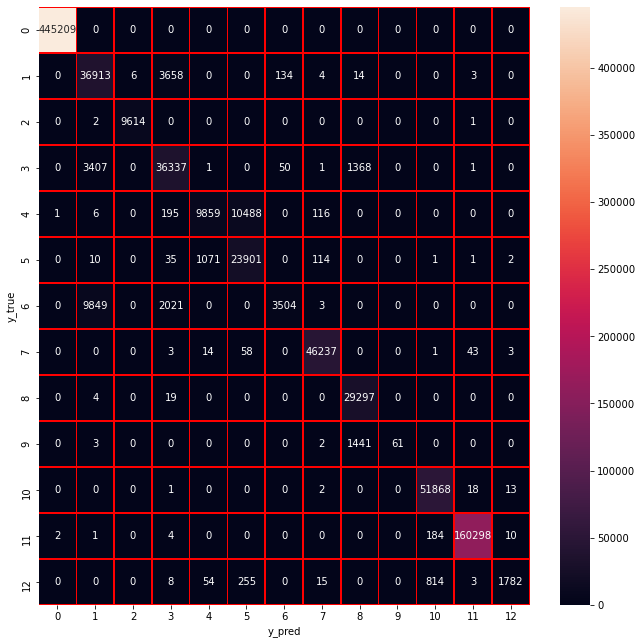

In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(11,11))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

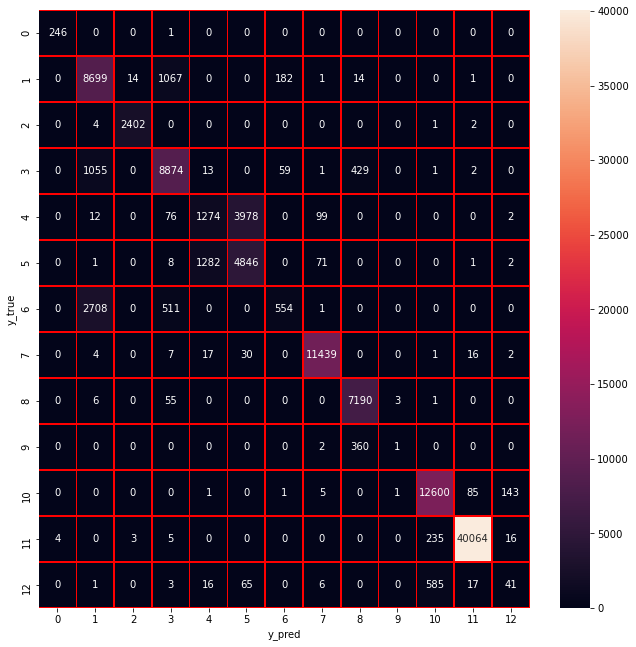

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(11,11))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
y_train= label_binarize(y_train, classes= [0,1,2,3,4,5,6,7,8,9,10,11,12])
n1_classes=y_train.shape[1]
print ("Number of classes ="+ str(n1_classes))

Number of classes =13


In [ ]:
# Compute micro-average ROC curve and ROC area

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n1_classes) :
    fpr[i], tpr[i], _= roc_curve(y_train[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

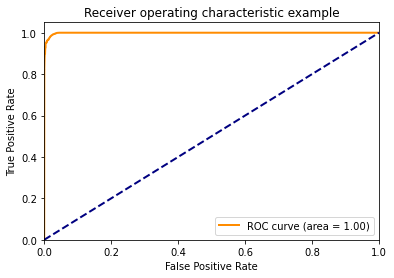

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area
y_test= label_binarize(y_test, classes= [0,1,2,3,4,5,6,7,8,9,10,11,12])
n_classes=y_test.shape[1]
print ("Number of classes ="+ str(n_classes))

Number of classes =13


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n1_classes) :
    fpr[i], tpr[i], _= roc_curve(y_test[:,i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

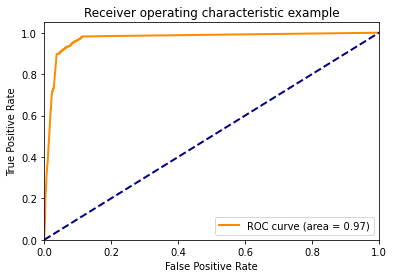

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()